## Ejercicios de pair programming 20 enero: Estandarizacion

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta.

    -Los objetivos del pair programming de hoy son:
        **Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.**
        **Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings**

In [13]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt



from scipy import stats
import math 
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

In [14]:
#abrimos nuestro DataFrame
df = pd.read_csv("archive/df_norm.csv", index_col = 0)
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Score_NORM,Score_LOG,Score_RAIZ,Score_BOX,Score_Sklearn
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.465049,2.026436,2.754451,4.535693,1.000000
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.459573,2.023003,2.749727,4.521204,0.994524


Para hacer la estandarizacion usaremos RobustScaler, ya que tenemos outliers

In [16]:
#sacaremos las variables numericas para hacer el robustscaler
numeric = df.select_dtypes(include = np.number).drop(['Happiness Score','Score_NORM',	'Score_LOG','Score_RAIZ',	'Score_BOX',	'Score_Sklearn'], axis=1)


In [17]:
robust = RobustScaler()

In [18]:
robust.fit(numeric)

RobustScaler()

In [19]:
X_robust = robust.transform(numeric)

In [20]:
numericas_robust = pd.DataFrame(X_robust, columns = numeric.columns)
numericas_robust.head(2)

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.993631,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617
1,-0.980892,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398


In [21]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Happiness Rank es:  0.003033060357901086
La desviación estándar de la columna Happiness Rank es: 0.5801136604802235
-------------------------------------------------------------
La media de la columna Economy (GDP per Capita) es:  -0.11547470105110864
La desviación estándar de la columna Economy (GDP per Capita) es: 0.6478151049569632
-------------------------------------------------------------
La media de la columna Family es:  -0.13031861146285015
La desviación estándar de la columna Family es: 0.8251340997675836
-------------------------------------------------------------
La media de la columna Health (Life Expectancy) es:  -0.1260765059566673
La desviación estándar de la columna Health (Life Expectancy) es: 0.6543308853249292
-------------------------------------------------------------
La media de la columna Freedom es:  -0.060198003007276644
La desviación estándar de la columna Freedom es: 0.682319840426305
------------------------------------------------

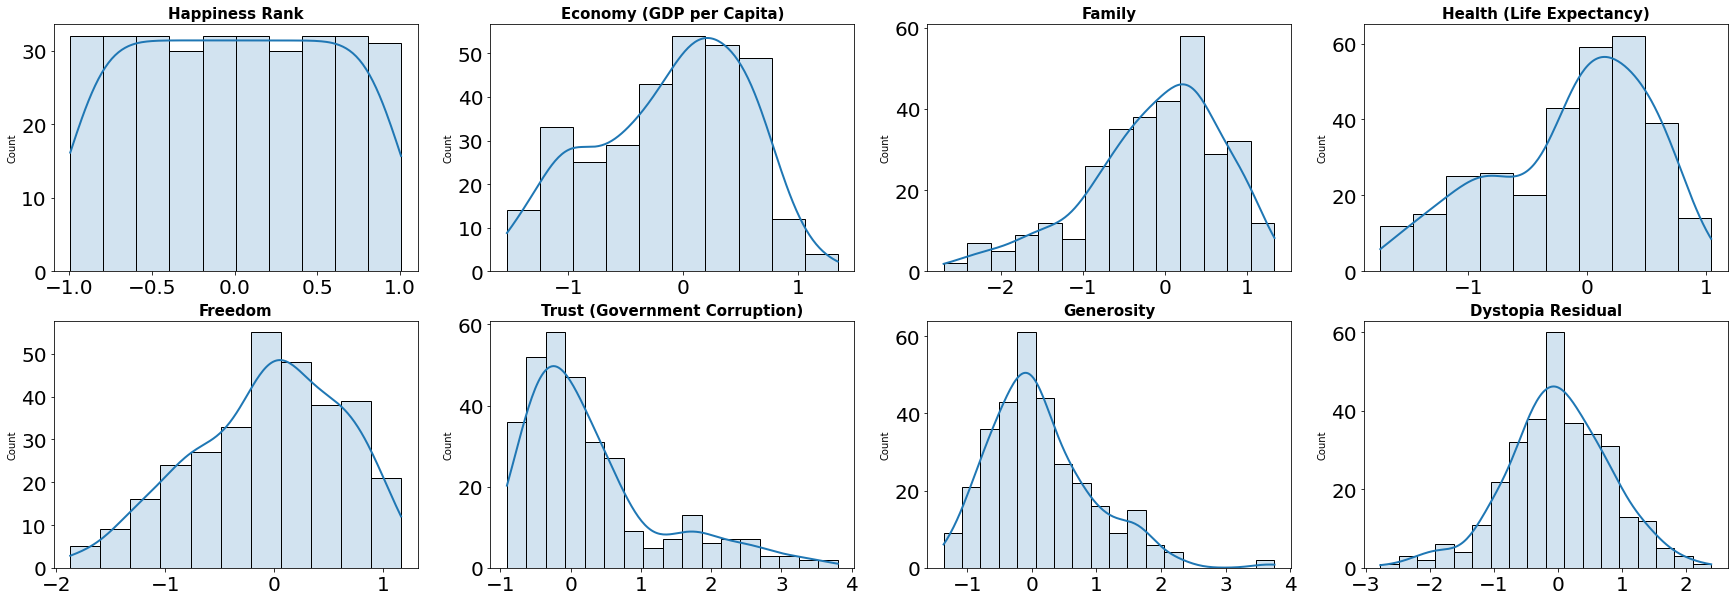

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [24]:
df.head()


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Score_NORM,Score_LOG,Score_RAIZ,Score_BOX,Score_Sklearn
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.465049,2.026436,2.754451,4.535693,1.000000
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.459573,2.023003,2.749727,4.521204,0.994524
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.452412,2.018497,2.743538,4.502236,0.987363
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.451359,2.017832,2.742626,4.499444,0.986310
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.431350,2.005122,2.725252,4.446302,0.966302


In [25]:
numericas_robust.head()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.993631,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617
1,-0.980892,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398
2,-0.968153,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316
3,-0.955414,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969
4,-0.942675,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023


In [ ]:
numericas_robust.to_csv("../data/predictoras_est.csv")